# Multiple Regression Analysis

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Multiple Regression: Econometric Framework

In econometrics, multiple linear regression is used to model the relationship between a dependent variable and multiple independent variables.

### Model Specification

Let:

- $Y$: dependent variable (e.g., income)
- $X_1, X_2, \ldots, X_k$: independent variables (e.g., education, experience, age)
- $\varepsilon$: error term

### The Multiple Linear Regression Model

$$
Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_k X_{ki} + \varepsilon_i
$$

Where:

- $\beta_0$: intercept
- $\beta_j$: partial effect of $X_j$ on $Y$, holding all other variables constant


### Interpretation of Coefficients

- $\beta_j$ represents the **marginal effect** of a one-unit change in $X_j$ on $Y$, **ceteris paribus**.
- $\varepsilon_i$ captures all other unobserved influences on $Y_i$.


### Gauss-Markov Assumptions (Classical Linear Regression Assumptions)

1. Linearity in parameters  
2. Random sampling  
3. No perfect multicollinearity  
4. Zero conditional mean: $E[\varepsilon_i \mid X_1, X_2, ..., X_k] = 0$  
5. Homoskedasticity: $Var(\varepsilon_i \mid X) = \sigma^2$

Under these assumptions, the OLS estimators are **BLUE**: Best Linear Unbiased Estimators.


### Simulation

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Simulate 40 observations
n = 40

# Independent variables
education = np.random.normal(14, 2, n)        # Mean years of education
experience = np.random.normal(10, 5, n)       # Years of work experience
age = np.random.normal(35, 10, n)             # Age in years

# Construct the dependent variable (income)
# Income = 20000 + 3000*education + 1000*experience + 500*age + noise
noise = np.random.normal(0, 10000, n)
income = 20000 + 3000*education + 1000*experience + 500*age + noise

# Create DataFrame
data = pd.DataFrame({
    'income': income,
    'education': education,
    'experience': experience,
    'age': age
})

# Define X and y
X = data[['education', 'experience', 'age']]
X = sm.add_constant(X)  # Adds intercept term
y = data['income']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     7.331
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           0.000587
Time:                        15:53:02   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      36   BIC:                             860.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.606e+04    1.4e+04      1.856      0.0

## Example 1

The effect of price and advertisement on sales revenue

In [4]:
import pandas as pd
# Load the Stata file
file_path = r"D:\Stata-Tutorial\stata\andy.dta"
data = pd.read_stata(file_path)

# Display first few rows
print(data.head())

   sales  price  advert
0   73.2   5.69     1.3
1   71.8   6.49     2.9
2   62.4   5.63     0.8
3   67.4   6.22     0.7
4   89.3   5.02     1.5


   sales  price  advert
0   73.2   5.69     1.3
1   71.8   6.49     2.9
2   62.4   5.63     0.8
3   67.4   6.22     0.7
4   89.3   5.02     1.5


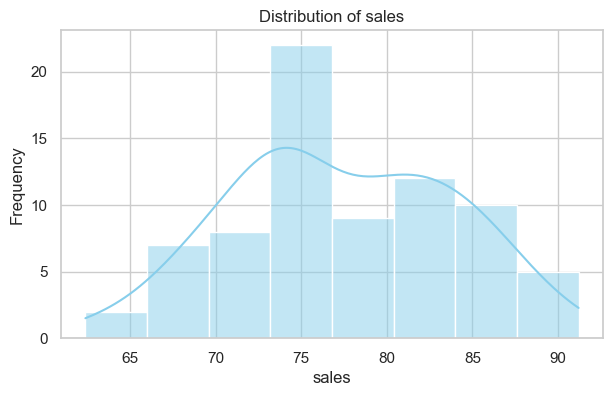

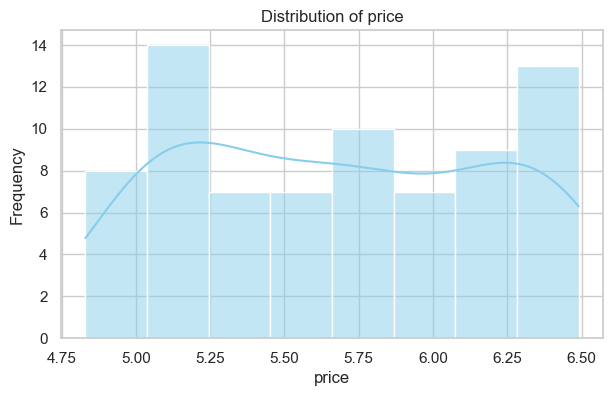

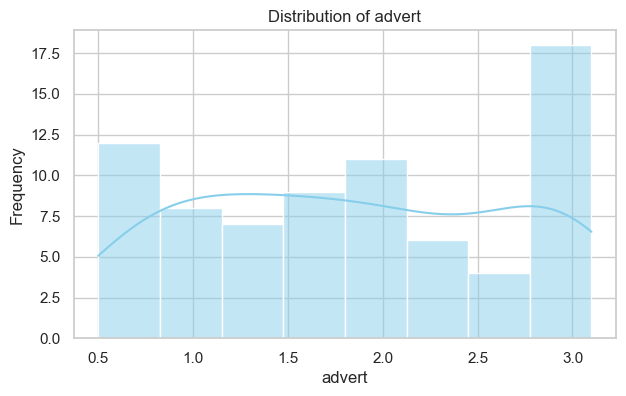

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the Stata file
file_path = r"D:\Stata-Tutorial\stata\andy.dta"
data = pd.read_stata(file_path)

# Display first few rows
print(data.head())


# Set visual style
sns.set(style="whitegrid")

# Plot histograms
variables = ['sales', 'price', 'advert']

for var in variables:
    plt.figure(figsize=(7, 4))
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

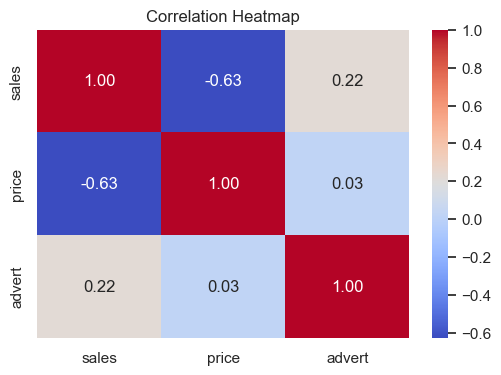

In [22]:
# Compute correlation matrix
corr_matrix = data[['sales', 'price', 'advert']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [23]:
# Descriptive summary
print(data[['sales', 'price', 'advert']].describe())

           sales      price     advert
count  75.000000  75.000000  75.000000
mean   77.374667   5.687200   1.844000
std     6.488537   0.518432   0.831677
min    62.400000   4.830000   0.500000
25%    73.200000   5.220000   1.100000
50%    76.500000   5.690000   1.800000
75%    82.200000   6.210000   2.700000
max    91.200000   6.490000   3.100000


In [24]:
# Define dependent and independent variables
X = data[['price', 'advert']]
X = sm.add_constant(X)  # add intercept
y = data['sales']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     29.25
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.04e-10
Time:                        15:53:12   Log-Likelihood:                -223.87
No. Observations:                  75   AIC:                             453.7
Df Residuals:                      72   BIC:                             460.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.9136      6.352     18.722      0.0

#### Prediction

Suppose I wants to predict sales revenue for a price of $5.50$ and an advertising expenditure of $1,200$.

In [25]:
# Manually create the correct DataFrame with all required columns
new_data = pd.DataFrame({
    'const': [1],         # Intercept term
    'price': [5.50],
    'advert': [1200]
})

# Predict sales
predicted_sales = model.predict(new_data)

# Print the prediction
print(f"Predicted sales revenue: ${predicted_sales[0]:,.2f}")


Predicted sales revenue: $2,310.52


Now, I plans to increase advertising expenditure by $800$ and drop the price by $40$ cents. The change in expected sales is

In [26]:
# Get the coefficients from the model
beta_price = model.params['price']
beta_advert = model.params['advert']

# Define the changes
delta_price = -0.40
delta_advert = 800

# Compute the change in expected sales
delta_sales = beta_price * delta_price + beta_advert * delta_advert

# Print the result
print(f"Change in expected sales: ${delta_sales:,.2f}")


Change in expected sales: $1,493.23


### Example 2: Second order Polynomial Multiple Regression

In [27]:
# Create a second-order polynomial for 'advert' (advert and advert^2)
data['advert_squared'] = data['advert'] ** 2

# Define the independent variables (including the polynomial term for 'advert')
X = data[['price', 'advert', 'advert_squared']]
X = sm.add_constant(X)  # add intercept
y = data['sales']

# Run the OLS regression
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     24.46
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.60e-11
Time:                        15:53:16   Log-Likelihood:                -219.55
No. Observations:                  75   AIC:                             447.1
Df Residuals:                      71   BIC:                             456.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            109.7190      6.799     16.

#### Example 3: Interaction Term

In [28]:
# Load the dataset
pizza_path = r"D:\Stata-Tutorial\stata\pizza4.dta"
df = pd.read_stata(pizza_path)

# View first few rows
print(df.head())

   pizza  female  hs  college  grad  income  age
0    109       1   0        0     0    19.5   25
1      0       1   0        0     0    39.0   45
2      0       1   0        0     0    15.6   20
3    108       1   0        0     0    26.0   28
4    220       1   1        0     0    19.5   25


In [29]:
# Create interaction term
df['age_income'] = df['age'] * df['income']

In [30]:
# Define independent variables
X = df[['age', 'income', 'age_income']]
X = sm.add_constant(X)  # add constant/intercept
y = df['pizza']

# Run the regression
model = sm.OLS(y, X).fit()

# Show regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  pizza   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     7.586
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           0.000468
Time:                        17:21:10   Log-Likelihood:                -248.42
No. Observations:                  40   AIC:                             504.8
Df Residuals:                      36   BIC:                             511.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.4654    120.663      1.338      0.1

In [47]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
pizza_path = r"D:\Stata-Tutorial\stata\cps_small.dta"
df = pd.read_stata(pizza_path)

# View first few rows
print(df.head())

   wage  educ  exper  female  black  white  midwest  south  west
0  2.03    13      2       1      0      1        0      1     0
1  2.07    12      7       0      0      1        1      0     0
2  2.12    12     35       0      0      1        0      1     0
3  2.54    16     20       1      0      1        0      1     0
4  2.68    12     24       1      0      1        0      1     0


In [49]:
# Drop rows with missing or zero wages to avoid log(0) error
df = df[df['wage'] > 0]

# Create log of wage
df['lwage'] = np.log(df['wage'])

df['educ_exper'] = df['educ'] * df['exper']

In [50]:
# Define independent and dependent variables
X = df[['educ', 'exper', 'educ_exper']]
X = sm.add_constant(X)
y = df['lwage']

# Run the OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.30e-70
Time:                        17:32:56   Log-Likelihood:                -661.52
No. Observations:                1000   AIC:                             1331.
Df Residuals:                     996   BIC:                             1351.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4205      0.091      4.633      0.0

#### Model Specification: Unrestricted and Restricted Model

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load data
file_path = r"D:\Stata-Tutorial\stata\andy.dta"
df = pd.read_stata(file_path)

# Create squared term
df['advert2'] = df['advert'] ** 2

# -----------------------
# Unrestricted model: sales ~ price + advert + advert^2
# -----------------------
X_unres = df[['price', 'advert', 'advert2']]
X_unres = sm.add_constant(X_unres)
y = df['sales']
model_unres = sm.OLS(y, X_unres).fit()

# -----------------------
# Restricted model: sales ~ advert + advert^2
# -----------------------
X_res = df[['advert', 'advert2']]
X_res = sm.add_constant(X_res)
model_res = sm.OLS(y, X_res).fit()

F-Statistics

In [3]:
# Perform F-test manually
RSS_r = model_res.ssr    # Residual sum of squares for restricted
RSS_ur = model_unres.ssr # Residual sum of squares for unrestricted

q = X_unres.shape[1] - X_res.shape[1]  # Number of restrictions (number of dropped variables)
n = X_unres.shape[0]                   # Number of observations
k_ur = X_unres.shape[1]                # Number of parameters in unrestricted model (including intercept)

F_stat = ((RSS_r - RSS_ur) / q) / (RSS_ur / (n - k_ur))

from scipy.stats import f
p_value = 1 - f.cdf(F_stat, q, n - k_ur)

print(f"F-statistic: {F_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 53.3549
P-value: 0.0000


If $p-value < 0.05$, reject the null hypothesis ⇒ price adds significant value to the model.

If $p-value ≥ 0.05$, fail to reject ⇒ price does not significantly improve the model over just advert and $advert^2$.

#### Adjusted-$R^2$ Akaike Information Criterion (AIC), and Schwarz Criterion / Bayesian Information Criterion (BIC)

When comparing regression models, especially in a multiple regression framework, it's essential to balance **goodness of fit** with **model complexity**. Below are three widely used criteria:

### 1. Adjusted-$R^2$

Adjusted-$R^2$ modifies the regular $R^2$ by accounting for the number of predictors in the model. Unlike $R^2$, which always increases when more variables are added, Adjusted-$R^2$ can **decrease** if added variables do not improve the model significantly.

$$\bar{R}^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)$$

Where:
- $\bar{R}^2$ = Adjusted R-squared  
- $R^2$ = Coefficient of determination  
- $n$ = Sample size  
- $k$ = Number of predictors (excluding intercept)

 Use when comparing **nested models**. Higher $\bar{R}^2$ indicates better model performance while adjusting for complexity.


### 2. Akaike Information Criterion (AIC)

AIC provides a trade-off between model fit and complexity. It penalizes models with more parameters.

$$\text{AIC} = n \cdot \ln\left( \frac{\text{RSS}}{n} \right) + 2k$$

Where:
- $\text{RSS}$ = Residual Sum of Squares  
- $k$ = Number of estimated parameters (including intercept)  
- $n$ = Number of observations

>  **Lower AIC values** are preferred.  
>  Use when comparing **non-nested models**.



### 3. Schwarz Criterion / Bayesian Information Criterion (BIC)

Also known as BIC, it penalizes model complexity more heavily than AIC, particularly for large sample sizes.

$$\text{BIC} = n \cdot \ln\left( \frac{\text{RSS}}{n} \right) + k \cdot \ln(n)$$

Where:
- Same symbols as above

>  **Lower BIC is better**. BIC tends to favor simpler models more than AIC.



###  Summary Table

| Criterion   | Penalizes Complexity | Preferred Value | Use Case                    |
|-------------|----------------------|------------------|-----------------------------|
| Adjusted-$R^2$ | Yes                  | Higher           | Nested model comparison     |
| AIC         | Yes (mildly)         | Lower            | Non-nested model comparison |
| BIC         | Yes (strongly)       | Lower            | Parsimonious model choice   |



>  **Goal**: Choose a model with good explanatory power while avoiding overfitting. Use these metrics in combination, not isolation.

#### Model Selection

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 100
income = np.random.normal(50000, 8000, n)
interest_rate = np.random.uniform(0.02, 0.08, n)
inflation = np.random.uniform(0.01, 0.06, n)
wealth = np.random.normal(150000, 30000, n)
age = np.random.randint(25, 65, n)

# Generate consumption with some true DGP
error = np.random.normal(0, 2000, n)
consumption = 5000 + 0.6 * income - 10000 * interest_rate - 3000 * inflation + 0.3 * wealth + error

# Create DataFrame
df = pd.DataFrame({
    'consumption': consumption,
    'income': income,
    'interest_rate': interest_rate,
    'inflation': inflation,
    'wealth': wealth,
    'age': age
})

# Define 5 models
models = {
    "Model 1": ['income'],
    "Model 2": ['income', 'interest_rate'],
    "Model 3": ['income', 'interest_rate', 'inflation'],
    "Model 4": ['income', 'interest_rate', 'inflation', 'wealth'],
    "Model 5": ['income', 'interest_rate', 'inflation', 'wealth', 'age']
}

# Fit models and compare
results = []

for name, predictors in models.items():
    X = df[predictors]
    X = sm.add_constant(X)
    y = df['consumption']
    model = sm.OLS(y, X).fit()
    
    adj_r2 = model.rsquared_adj
    aic = model.aic
    bic = model.bic
    
    results.append({
        "Model": name,
        "Adj R2": round(adj_r2, 4),
        "AIC": round(aic, 2),
        "BIC": round(bic, 2)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display comparison
print("Model Comparison:\n")
print(results_df.sort_values(by="Adj R2", ascending=False))

Model Comparison:

     Model  Adj R2      AIC      BIC
3  Model 4  0.9441  1833.96  1846.98
4  Model 5  0.9435  1835.83  1851.46
0  Model 1  0.1487  2103.31  2108.52
1  Model 2  0.1443  2104.79  2112.61
2  Model 3  0.1434  2105.87  2116.29


Interpretation

Adjusted $R^2$ slightly decreases as we add more variables, which suggests the added predictors aren't improving the model's explanatory power significantly.

$AIC$ and $BIC$ are lowest for Model 1, indicating it is the most parsimonious model with the best balance of fit and simplicity.

In [11]:
!jupyter nbconvert Multiple_Regression_Analysis.ipynb --to latex

[NbConvertApp] Converting notebook Multiple_Regression_Analysis.ipynb to latex
[NbConvertApp] Support files will be in Multiple_Regression_Analysis_files\
[NbConvertApp] Making directory Multiple_Regression_Analysis_files
[NbConvertApp] Writing 71525 bytes to Multiple_Regression_Analysis.tex


In [12]:
!xelatex Multiple_Regression_Analysis.tex -quiet